In [ ]:
#Oct_2nd_Image_classification_MNIST_dataset

In [ ]:
keras.datasets modules having some builtin image dataset available---
(1)mnist (classification of 10 digits--- 0 to 9)
(2)fashion_mnist ( classification of 10 fashion categories)
(3)cifar10 ( classification of 10 different transporation system)
(4)cifar100 (classification of 100 different images)

In [ ]:
#mnist (classification of 10 digits--- 0 to 9)

In [1]:
# import some basic libraries
import tensorflow as tf
import tensorflow.keras
import numpy as np
import matplotlib.pyplot as plt
# import the dataset from keras library
from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Flatten

from keras.utils import to_categorical # CHANGE THE CATEGORY OF DIFFERENT CLASSES

In [2]:
data=tf.keras.datasets
data

<module 'keras.api._v2.keras.datasets' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/__init__.py'>

In [3]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
print("X_train original shape",X_train.shape)
print("Y_train original shape",Y_train.shape)
print("X_test original shape",X_test.shape)
print("Y_test original shape",Y_test.shape)

X_train original shape (60000, 28, 28)
Y_train original shape (60000,)
X_test original shape (10000, 28, 28)
Y_test original shape (10000,)


In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
Y_train[0]

5

In [8]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
X_test[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 116, 125, 171,
        255, 255, 150,  93,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 169, 253, 253, 253,
        253, 253, 253, 218,  30,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 169, 253, 253, 253, 213,
        142, 176, 253, 253, 122,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [10]:
Y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [11]:
Y_test[8]

5

In [12]:
# lets see the dataset in image format

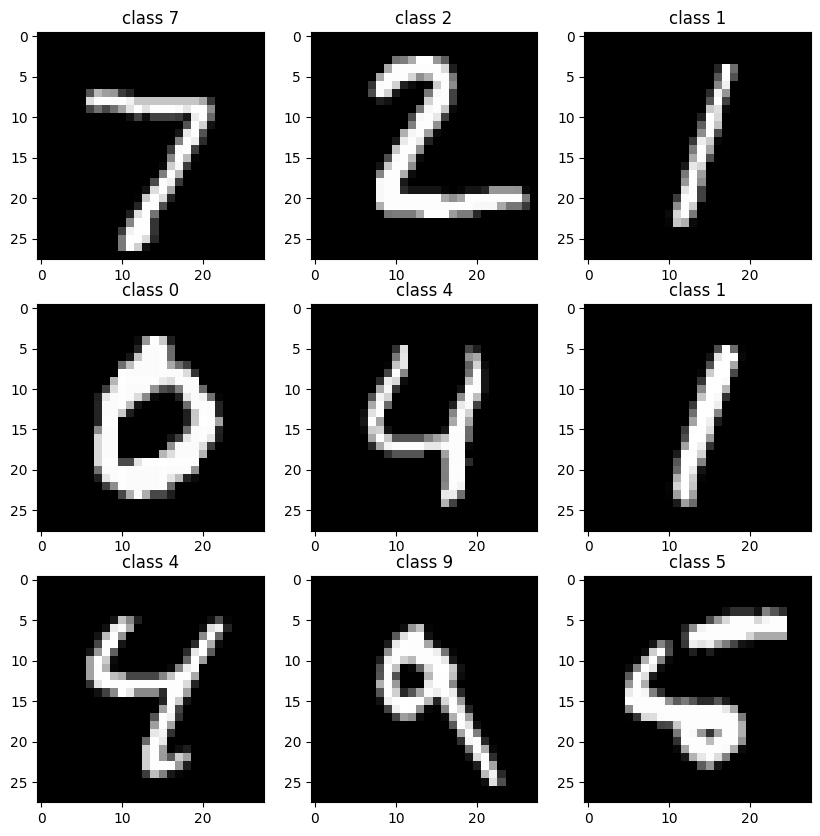

In [13]:
plt.rcParams["figure.figsize"]=(10,10)
for i in range (9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_test[i],cmap="gray")
  plt.title("class {}".format(Y_test[i]))

In [14]:
X_test[0]# shade of number 7

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [15]:
X_test[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  38, 254, 109,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  87, 252,  82,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
# here it is black and white . 0--> black, 1-->white
#The intensity of brightness ia between 0-255
# intensity of resolution -- means number of pixels per square inch. which determine the
#clarity of sharpness of the image.
# if no. of pixels is high per square inch the image is sharp  having a good spatial resolution
#In radiology , the spatial resolution is used to differentiate between objects located
#close to each other.

In [16]:
X_train.ndim

3

In [17]:
X_test.ndim

3

In [18]:
X_test[0].shape

(28, 28)

In [19]:
X_train[110].shape

(28, 28)

In [20]:
len(X_test[0])

28

In [21]:
Y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [22]:
Y_test.shape

(10000,)

In [23]:
Y_test[0]

7

In [24]:
Y_train[0]

5

In [25]:
nb_classes=10
Y_train=to_categorical(Y_train,nb_classes)
Y_test=to_categorical(Y_test,nb_classes)


In [26]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [27]:
Y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [28]:
X_train.shape

(60000, 28, 28)

In [29]:
X_test.shape

(10000, 28, 28)

In [ ]:
# reshaping the data for the convenience of input layer

In [30]:
X_train=X_train.reshape(60000,784)
X_test=X_test.reshape(10000,784)

In [31]:
X_train.shape

(60000, 784)

In [32]:
X_test.shape

(10000, 784)

In [ ]:
# SCALING IS REQUIRED IN DEEP LEARNING
#Values are 0 to 255 , we will scale it ( we can divide it by 255)

In [33]:
X_train=X_train/255
X_test=X_test/255


In [ ]:
#X_test[0]

In [34]:
# model building process
model=tf.keras.Sequential([
tf.keras.layers.Dense(512,activation=tf.nn.relu),
tf.keras.layers.Dense(256,activation=tf.nn.relu),
tf.keras.layers.Dense(128,activation=tf.nn.relu),
tf.keras.layers.Dense(64,activation=tf.nn.relu),
tf.keras.layers.Dense(10,activation=tf.nn.softmax)])



In [35]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [36]:
history=model.fit(X_train,Y_train,batch_size=128,epochs=10,verbose=1,validation_data=(X_test,Y_test))

Epoch 1/10
469/469 [==============================] - 9s 5ms/step - loss: 0.2424 - accuracy: 0.9268 - val_loss: 0.1023 - val_accuracy: 0.9676
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0853 - accuracy: 0.9733 - val_loss: 0.0831 - val_accuracy: 0.9733
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0566 - accuracy: 0.9821 - val_loss: 0.0725 - val_accuracy: 0.9789
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0426 - accuracy: 0.9873 - val_loss: 0.0815 - val_accuracy: 0.9764
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0341 - accuracy: 0.9892 - val_loss: 0.0710 - val_accuracy: 0.9791
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0268 - accuracy: 0.9913 - val_loss: 0.0801 - val_accuracy: 0.9781
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0245 - accuracy: 0.9922 - val_loss: 0.0864 - val_accuracy: 0.9774
Epoch 

In [ ]:
#60,000/128=469 no. of batch will create

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 575050 (2.19 MB)
Trainable params: 575050 (2.19 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# it has taken 28*28=784 no. of neurons in the input layer
what is param 401920--> it is 784 *512=401408 no. of connections + 512 no. of Bias=401920.
what is param 131328--> it is 512 *256=131072 no. of connections + 256 no. of Bias=131328.
what is param 32896--> it is 256 *128=32768 no. of connections + 128 no. of Bias=32896.

what is param 650--> it is 64 *10=640 no. of connections + 10 no. of Bias=650.


In [ ]:
history.history["accuracy"]

[0.9284999966621399,
 0.9731666445732117,
 0.9811166524887085,
 0.987416684627533,
 0.9890166521072388,
 0.9905166625976562,
 0.991516649723053,
 0.9926166534423828,
 0.9942166805267334,
 0.9940999746322632]

In [ ]:
# prediction of test dataset

In [39]:
prediction_test=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
prediction_test

array([[4.0125855e-10, 1.0143229e-06, 8.0910560e-08, ..., 9.9999845e-01,
        4.5376654e-09, 8.3780741e-08],
       [7.2577722e-11, 1.7636606e-09, 1.0000000e+00, ..., 2.2850220e-12,
        9.7850089e-11, 5.6211932e-14],
       [2.5821311e-08, 9.9995732e-01, 4.1591243e-06, ..., 7.9674173e-06,
        2.5558398e-05, 1.9255239e-08],
       ...,
       [9.5523838e-13, 6.8549912e-09, 1.3820444e-08, ..., 1.8245362e-07,
        3.0336754e-08, 4.7663463e-08],
       [9.9574246e-12, 1.1997844e-12, 8.5799931e-15, ..., 5.1129467e-13,
        8.2232593e-10, 3.7951595e-12],
       [2.3900519e-15, 2.0954034e-15, 1.0055150e-17, ..., 2.3099125e-19,
        1.1815022e-14, 8.2119758e-17]], dtype=float32)

In [40]:
prediction_test[0]

array([1.0109940e-10, 2.0198664e-07, 4.0865228e-11, 3.6723244e-09,
       1.2143695e-09, 1.6434475e-11, 5.8225229e-13, 9.9999857e-01,
       1.1240169e-09, 1.1734081e-06], dtype=float32)

In [41]:
np.argmax(prediction_test[0])

7

In [ ]:
prediction_test[1]

array([7.2577722e-11, 1.7636606e-09, 1.0000000e+00, 8.4201271e-11,
       2.3523528e-10, 3.7965008e-15, 3.9553092e-12, 2.2850220e-12,
       9.7850089e-11, 5.6211932e-14], dtype=float32)

In [ ]:
np.argmax(prediction_test[1])

2

In [ ]:
prediction_test[2]

array([2.5821311e-08, 9.9995732e-01, 4.1591243e-06, 1.4037644e-09,
       4.1490657e-06, 7.0696800e-08, 6.9246840e-07, 7.9674173e-06,
       2.5558398e-05, 1.9255239e-08], dtype=float32)

In [ ]:
np.argmax(prediction_test[2])

1

In [ ]:
# using other layers Flatten,Dropout

In [42]:
from tensorflow.keras.layers import Flatten,Dropout

In [48]:
model2=Sequential()
model2.add(Dense(512,activation=tf.nn.relu)),
model2.add(Dense(256,activation=tf.nn.relu)),
model2.add(Dropout(0.6)),
model2.add(Dense(128,activation=tf.nn.relu)),
model2.add(Dropout(0.6)),
model2.add(Dense(64,activation=tf.nn.relu)),
model2.add(Flatten())
model2.add(Dense(10,activation=tf.nn.softmax)),

(None,)

In [49]:
model2.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [52]:
history2=model2.fit(X_train,Y_train,batch_size=128,epochs=20,verbose=1,validation_data=(X_test,Y_test))

Epoch 1/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0373 - accuracy: 0.9895 - val_loss: 0.0882 - val_accuracy: 0.9812
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0349 - accuracy: 0.9898 - val_loss: 0.0935 - val_accuracy: 0.9816
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0314 - accuracy: 0.9913 - val_loss: 0.0975 - val_accuracy: 0.9831
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0288 - accuracy: 0.9917 - val_loss: 0.1007 - val_accuracy: 0.9812
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0296 - accuracy: 0.9920 - val_loss: 0.1031 - val_accuracy: 0.9810
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0238 - accuracy: 0.9934 - val_loss: 0.0965 - val_accuracy: 0.9826
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0235 - accuracy: 0.9932 - val_loss: 0.1054 - val_accuracy: 0.9826
Epoch 

In [51]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 512)               401920    
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 flatten (Flatten)           (None, 64)               

In [ ]:
#EarlyStopping - It will stop further epochs if the accuracy is dropping (if selected metrics as accuracy )

In [53]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [56]:
early_stopping=EarlyStopping(monitor="val_loss",patience=2,verbose=1,mode="min")
callbacks=[early_stopping]
# the optimum patience should be 3-5

In [ ]:
#patience: Number of epochs with no improvement after which training will be stopped.

In [64]:
tf.random.set_seed(100)
# similar to supervised ML , we have used the concept of random_state

In [65]:
model3=Sequential()
model3.add(Dense(512,activation=tf.nn.relu)),
model3.add(Dense(256,activation=tf.nn.relu)),
model3.add(Dropout(0.6)),
model3.add(Dense(128,activation=tf.nn.relu)),
model3.add(Dropout(0.6)),
model3.add(Dense(64,activation=tf.nn.relu)),
model3.add(Flatten())
model3.add(Dense(10,activation=tf.nn.softmax)),

(None,)

In [66]:
model3.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [67]:
history3=model3.fit(X_train,Y_train,batch_size=128,epochs=20,callbacks=callbacks,verbose=1,validation_data=(X_test,Y_test))

Epoch 1/20
469/469 [==============================] - 5s 6ms/step - loss: 0.5447 - accuracy: 0.8303 - val_loss: 0.1395 - val_accuracy: 0.9593
Epoch 2/20
469/469 [==============================] - 3s 5ms/step - loss: 0.1857 - accuracy: 0.9507 - val_loss: 0.1086 - val_accuracy: 0.9698
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1260 - accuracy: 0.9670 - val_loss: 0.0976 - val_accuracy: 0.9740
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1027 - accuracy: 0.9730 - val_loss: 0.0851 - val_accuracy: 0.9768
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0804 - accuracy: 0.9787 - val_loss: 0.0808 - val_accuracy: 0.9782
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0668 - accuracy: 0.9823 - val_loss: 0.0968 - val_accuracy: 0.9758
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0615 - accuracy: 0.9833 - val_loss: 0.0877 - val_accuracy: 0.9790
Epoch 